### "Évolution du Passage aux Véhicules Électriques au Fil des Années"

#### Objectif de l'étude :
- Analyser l'évolution du passage aux véhicules électriques au fil des années.

- Importance de la transition vers les véhicules électriques pour la durabilité environnementale et la réduction des émissions de gaz à effet de serre.
#### Contexte de l'étude : 
- Croissance de la technologie des véhicules électriques, politiques de réduction des émissions, demande croissante de véhicules respectueux de l'environnement.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [187]:
df = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County_.csv")

In [188]:
df.head(10)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [190]:

# Convertir les colonnes spécifiées en float
columns_to_convert = ["Battery Electric Vehicles (BEVs)", 
                      "Plug-In Hybrid Electric Vehicles (PHEVs)", 
                      "Electric Vehicle (EV) Total", 
                      "Non-Electric Vehicle Total", 
                      "Total Vehicles"]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Assurez-vous que les colonnes ont été converties avec succès
print(df.dtypes)

Date                                         object
County                                       object
State                                        object
Vehicle Primary Use                          object
Battery Electric Vehicles (BEVs)            float64
Plug-In Hybrid Electric Vehicles (PHEVs)    float64
Electric Vehicle (EV) Total                 float64
Non-Electric Vehicle Total                  float64
Total Vehicles                              float64
Percent Electric Vehicles                   float64
dtype: object


In [191]:
df.describe()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20266.000000,20468.000000,20119.000000,13983.000000,13979.000000,20819.000000
mean,25.855176,21.790942,31.623093,132.845312,134.463767,4.139216
std,102.004224,92.309729,115.742017,174.033916,174.448753,11.055350
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,26.000000,27.000000,0.390000
50%,1.000000,1.000000,1.000000,69.000000,70.000000,1.220000
75%,2.000000,1.000000,3.000000,167.000000,169.000000,2.995000
max,999.000000,999.000000,999.000000,999.000000,998.000000,100.000000


In [192]:
df.isna().sum()

Date                                           0
County                                        86
State                                         86
Vehicle Primary Use                            0
Battery Electric Vehicles (BEVs)             553
Plug-In Hybrid Electric Vehicles (PHEVs)     351
Electric Vehicle (EV) Total                  700
Non-Electric Vehicle Total                  6836
Total Vehicles                              6840
Percent Electric Vehicles                      0
dtype: int64

In [204]:
# Remplacer les valeurs non numériques par leurs voisins les plus proches pour chaque variable dans le dataframe df
df = df.fillna(method='ffill').fillna(method='bfill')

df.isna().sum()


C:\Users\yacin\AppData\Local\Temp\ipykernel_20012\3969387719.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
Year                                        0
dtype: int64

In [193]:
df["Vehicle Primary Use"].unique()

array(['Passenger', 'Truck'], dtype=object)

In [205]:
# convertir la date en format date
df["Date"] = pd.to_datetime (df["Date"]) 


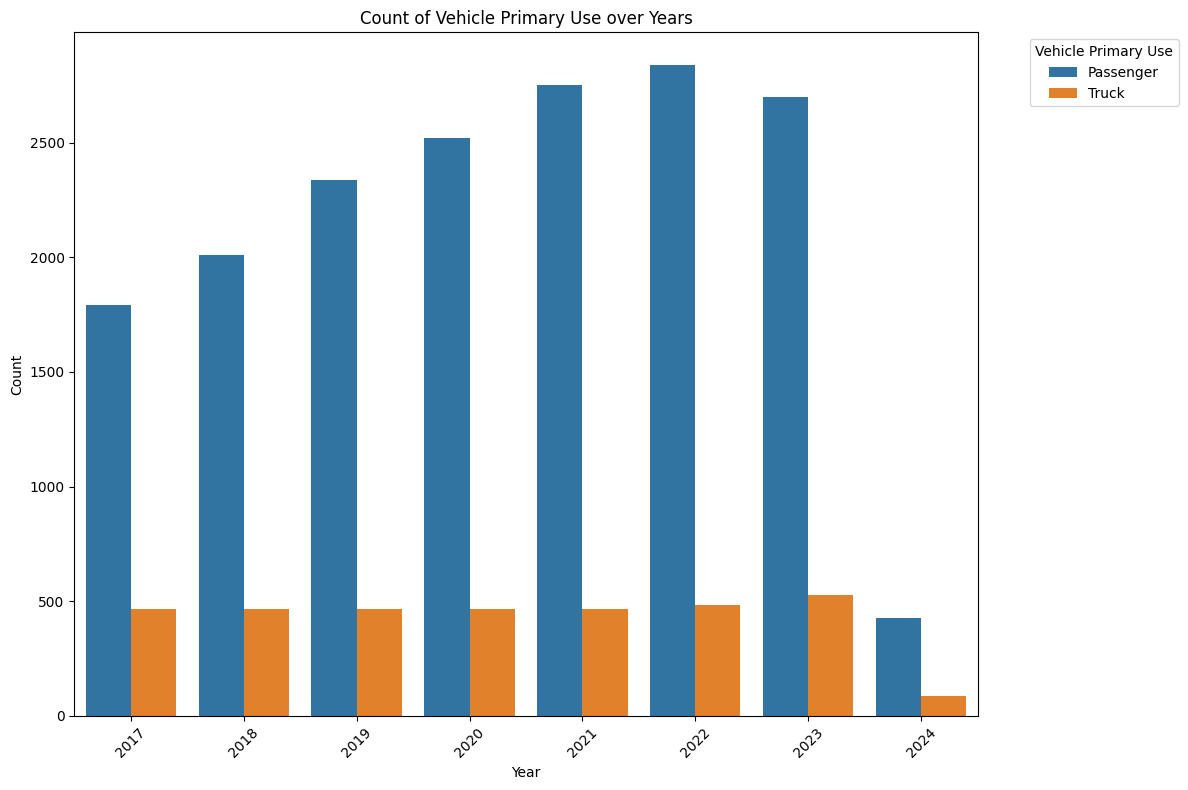

In [207]:
# Extraire l'année de la colonne "Date"
df["Year"] = df["Date"].dt.year

# Compter le nombre d'occurrences de chaque catégorie de "Vehicle Primary Use" pour chaque année
usage_count = df.groupby(['Year', 'Vehicle Primary Use']).size().reset_index(name='Count')

# Tracer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Count", hue="Vehicle Primary Use", data=usage_count)
plt.title('Count of Vehicle Primary Use over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Primary Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


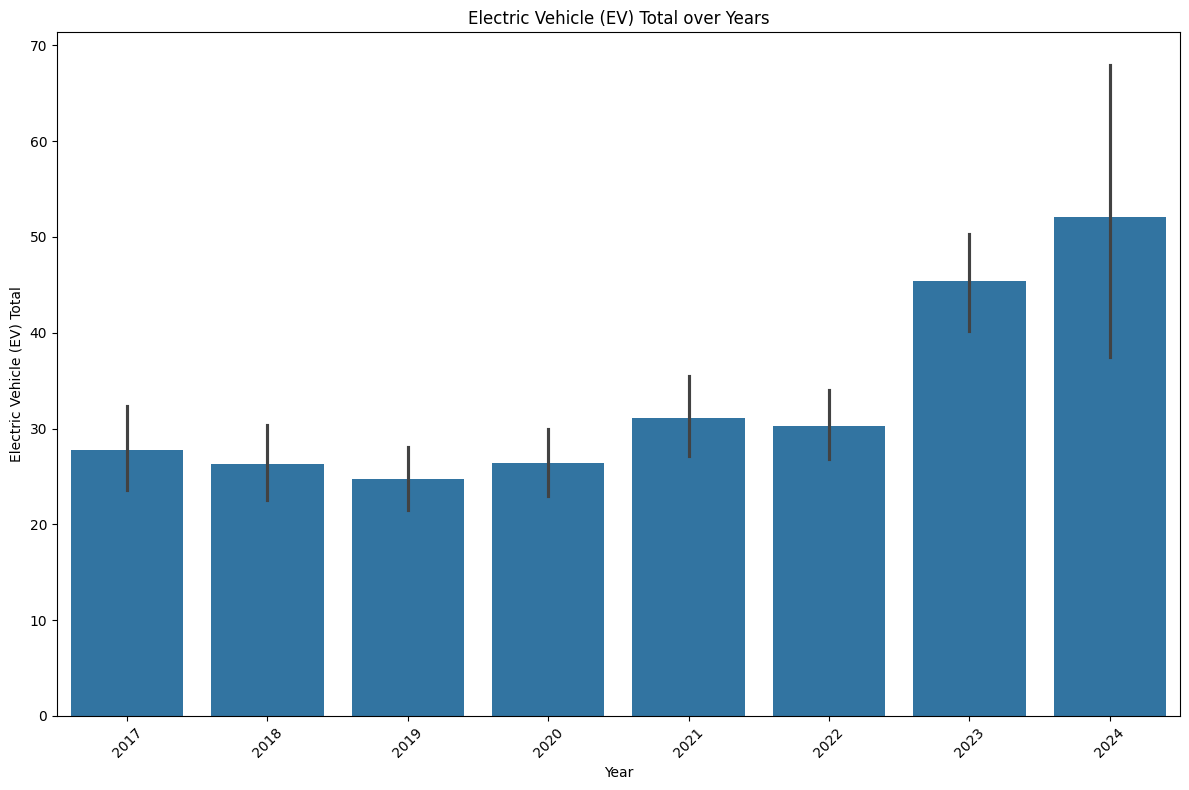

In [208]:
# Tracer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Electric Vehicle (EV) Total", data=df)
plt.title('Electric Vehicle (EV) Total over Years')
plt.xlabel('Year')
plt.ylabel('Electric Vehicle (EV) Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



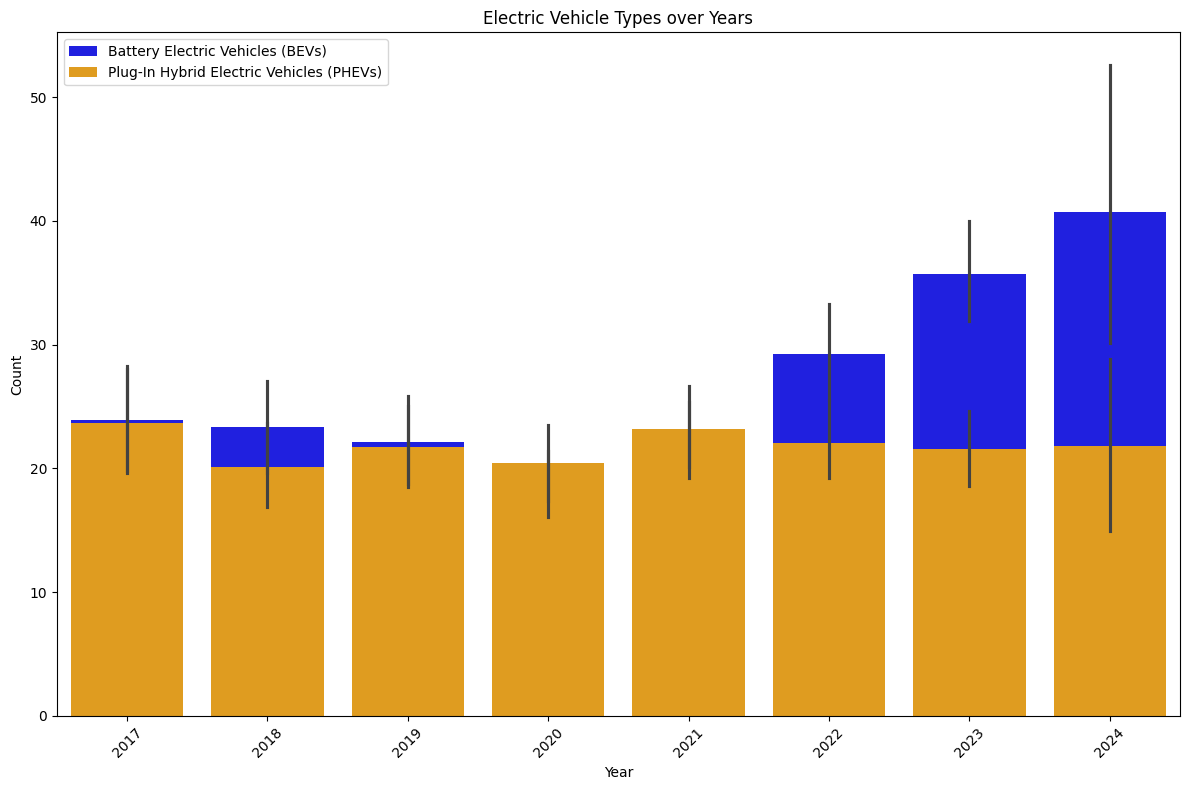

In [209]:
# Tracer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Battery Electric Vehicles (BEVs)", data=df, color='blue', label='Battery Electric Vehicles (BEVs)')
sns.barplot(x="Year", y="Plug-In Hybrid Electric Vehicles (PHEVs)", data=df, color='orange', label='Plug-In Hybrid Electric Vehicles (PHEVs)')

plt.title('Electric Vehicle Types over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

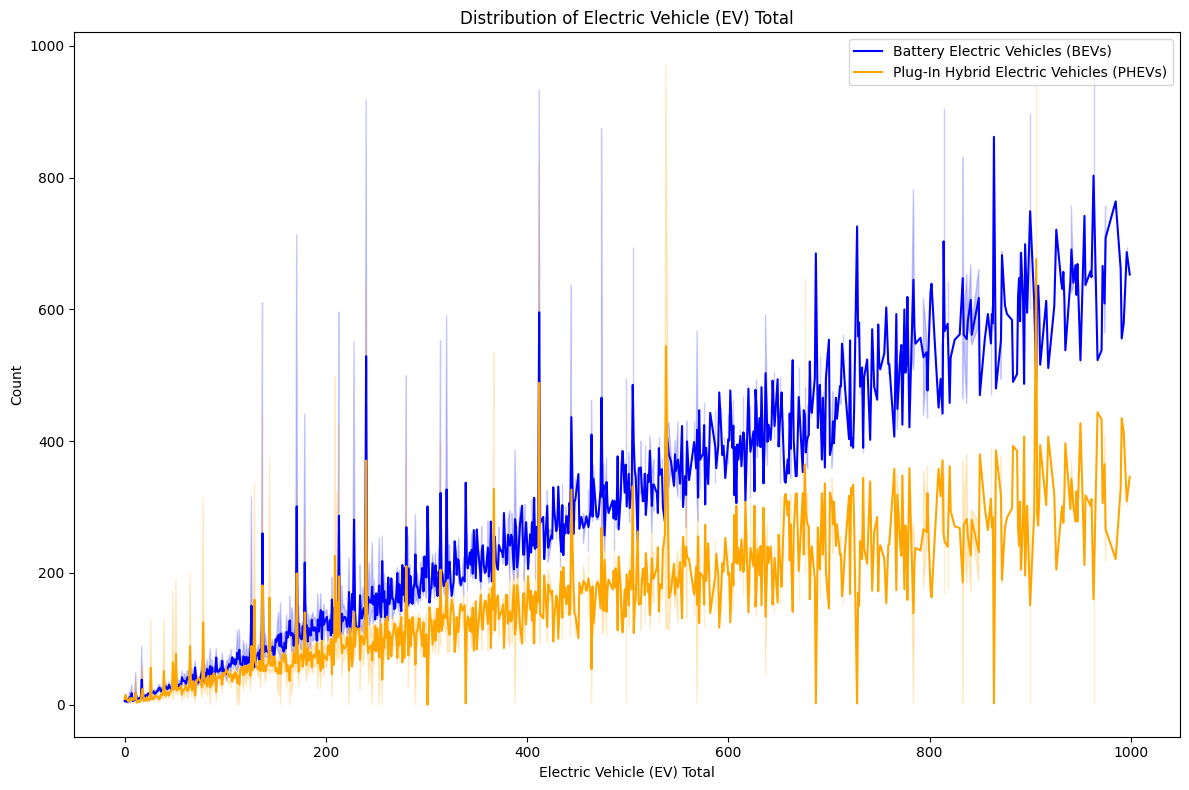

In [210]:

# Tracer le graphique linéaire pour les véhicules électriques de type BEVs
plt.figure(figsize=(12, 8))
sns.lineplot(x="Electric Vehicle (EV) Total", y="Battery Electric Vehicles (BEVs)", data=df, color="blue", label="Battery Electric Vehicles (BEVs)")

# Tracer le graphique linéaire pour les véhicules électriques de type PHEVs
sns.lineplot(x="Electric Vehicle (EV) Total", y="Plug-In Hybrid Electric Vehicles (PHEVs)", data=df, color="orange", label="Plug-In Hybrid Electric Vehicles (PHEVs)")

plt.title('Distribution of Electric Vehicle (EV) Total')
plt.xlabel('Electric Vehicle (EV) Total')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

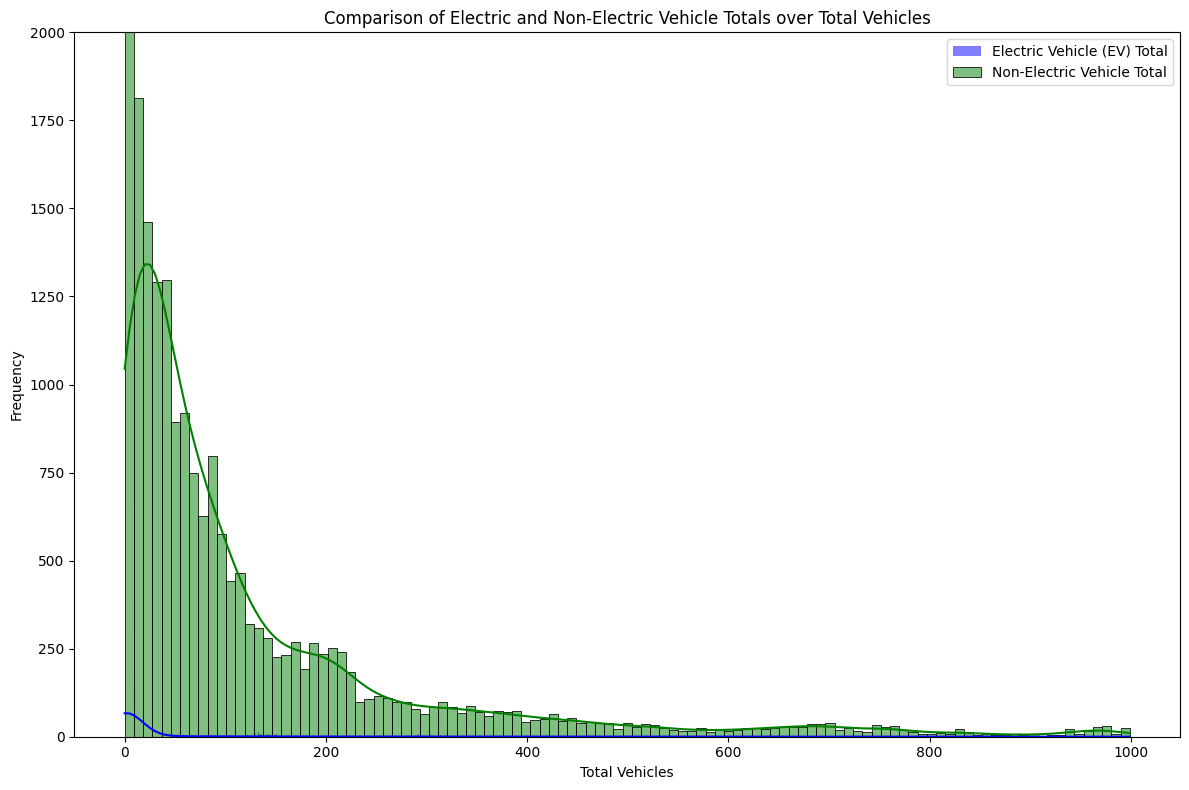

In [211]:
# Tracer les histogrammes pour chaque variable avec Total Vehicles sur l'axe des abscisses
plt.figure(figsize=(12, 8))

# Electric Vehicle (EV) Total
sns.histplot(df["Electric Vehicle (EV) Total"], color="blue", label="Electric Vehicle (EV) Total", alpha=0.5, kde=True)

# Non-Electric Vehicle Total
sns.histplot(df["Non-Electric Vehicle Total"], color="green", label="Non-Electric Vehicle Total", alpha=0.5, kde=True)

# Titre du graphique
plt.title('Comparison of Electric and Non-Electric Vehicle Totals over Total Vehicles')
plt.xlabel('Total Vehicles')
plt.ylabel('Frequency')
plt.legend()

# Changer l'échelle de l'axe y
plt.ylim(0, 2000)  # Remplacez les valeurs 0 et 2000 par les limites y souhaitées

plt.tight_layout()
plt.show()

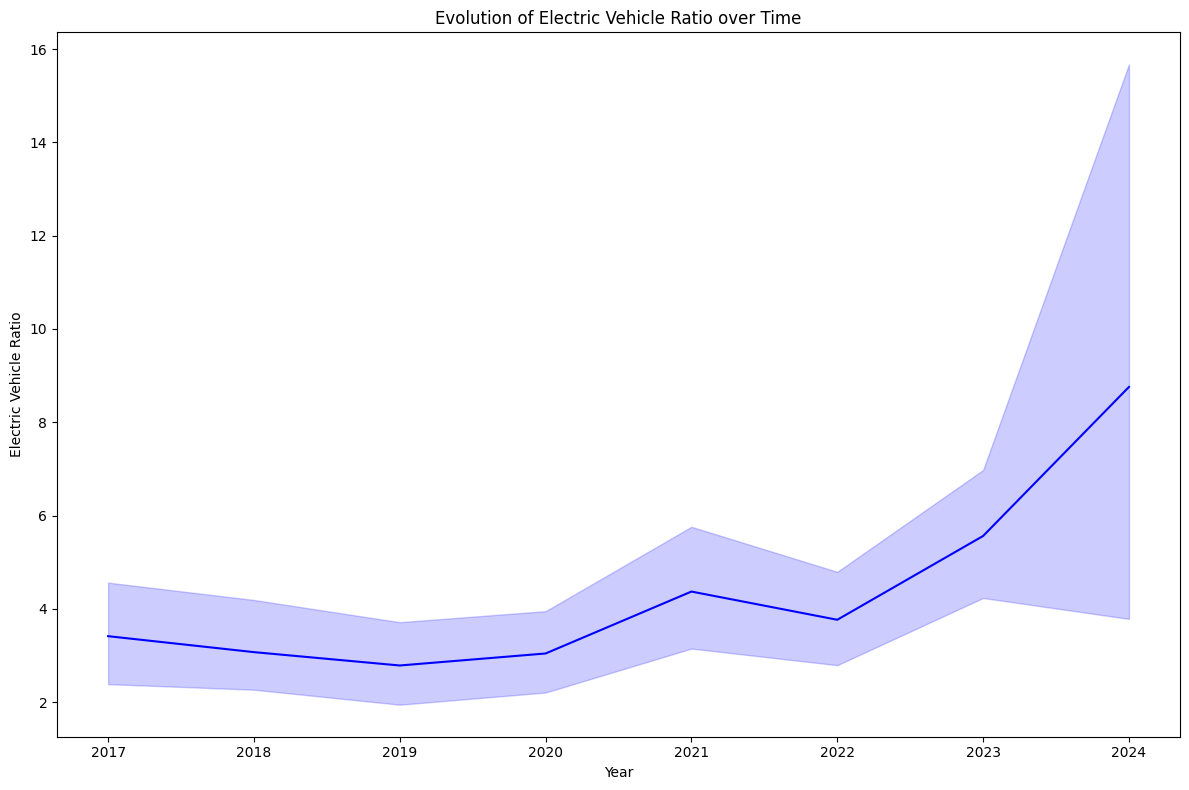

In [212]:
# Calculer le ratio des véhicules électriques par rapport au total
df["Electric Vehicle Ratio"] = df["Electric Vehicle (EV) Total"] / df["Total Vehicles"]

# Tracer le graphique linéaire
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Electric Vehicle Ratio", data=df, color="blue")
plt.title('Evolution of Electric Vehicle Ratio over Time')
plt.xlabel('Year')
plt.ylabel('Electric Vehicle Ratio')
plt.tight_layout()
plt.show()

In [214]:
# Sélectionner les 10 premiers comtés en termes de production de véhicules électriques
top_10_counties = df.nlargest(10, "Electric Vehicle (EV) Total")

# Calculer la production totale de véhicules électriques pour chaque comté parmi les 10 premiers
production_by_county = top_10_counties.groupby("County")["Electric Vehicle (EV) Total"].sum()

# Trier les résultats par ordre décroissant de production
production_by_county_sorted = production_by_county.sort_values(ascending=False)

# Afficher la production totale pour chaque comté
for county, production in production_by_county_sorted.items():
    print(f"Production totale de véhicules électriques pour {county}: {production}")


Production totale de véhicules électriques pour Clallam: 1971.0
Production totale de véhicules électriques pour Chelan: 1960.0
Production totale de véhicules électriques pour Kitsap: 999.0
Production totale de véhicules électriques pour Skagit: 996.0
Production totale de véhicules électriques pour Benton: 993.0
Production totale de véhicules électriques pour Spokane: 991.0
Production totale de véhicules électriques pour Island: 990.0
Production totale de véhicules électriques pour Whatcom: 974.0


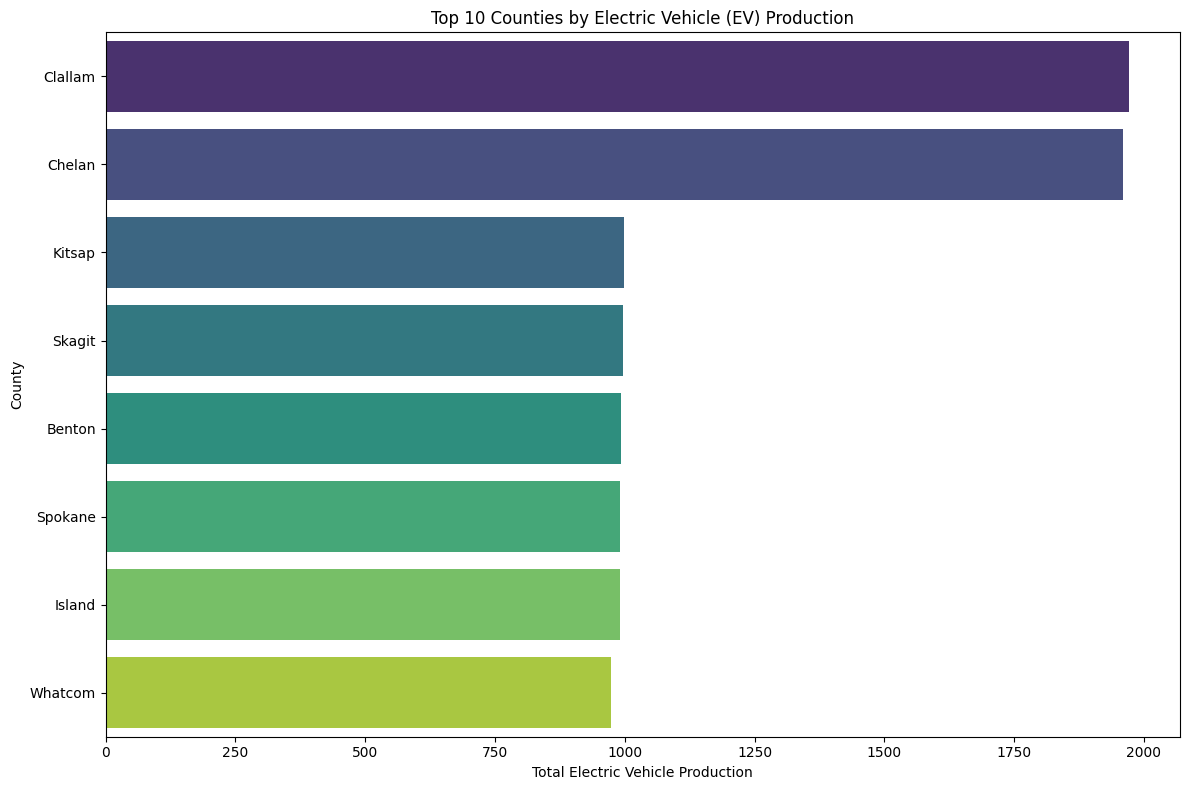

In [215]:
# Tracer un graphique à barres en spécifiant `hue`
plt.figure(figsize=(12, 8))
sns.barplot(x=production_by_county_sorted.values, y=production_by_county_sorted.index, hue=production_by_county_sorted.index, palette="viridis", legend=False)
plt.title('Top 10 Counties by Electric Vehicle (EV) Production')
plt.xlabel('Total Electric Vehicle Production')
plt.ylabel('County')
plt.tight_layout()
plt.show()


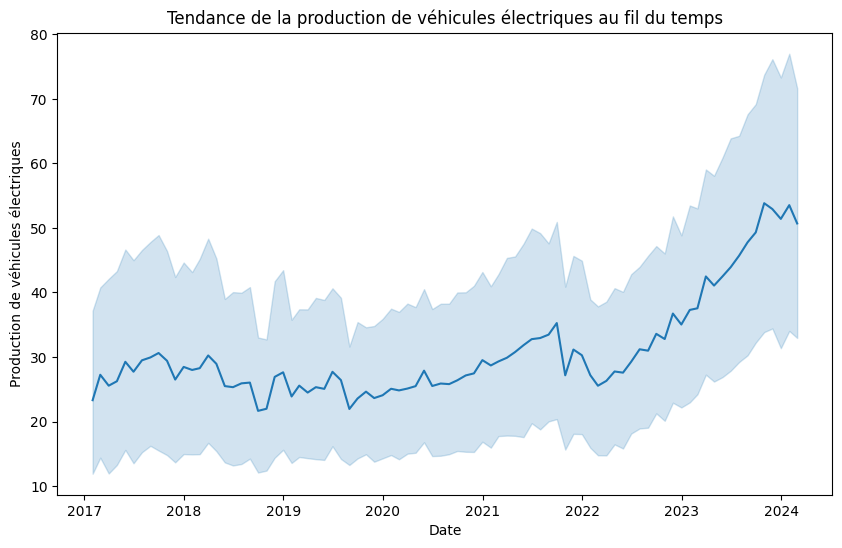

In [216]:
# Tracer un graphique de ligne pour la production de véhicules électriques au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Electric Vehicle (EV) Total", data=df)
plt.title('Tendance de la production de véhicules électriques au fil du temps')
plt.xlabel('Date')
plt.ylabel('Production de véhicules électriques')
plt.show()


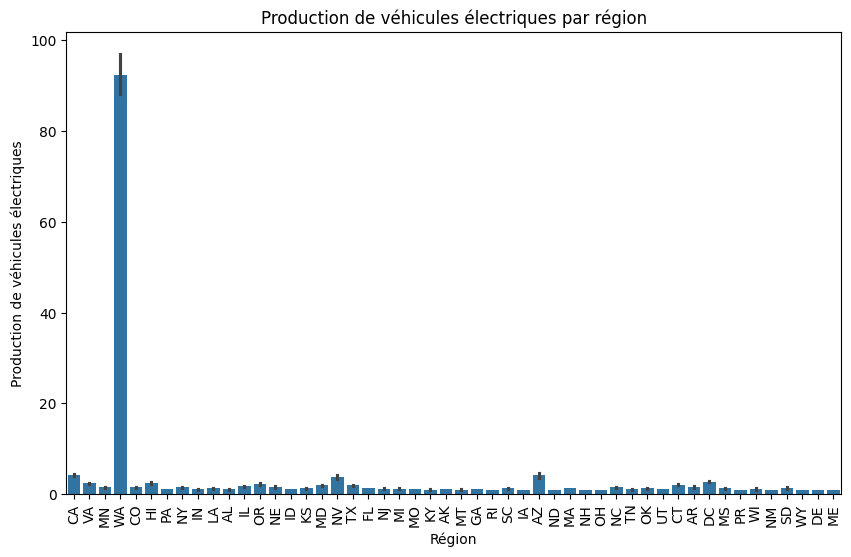

In [222]:
# Tracer un graphique de barres pour comparer la production de véhicules électriques par région
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Electric Vehicle (EV) Total", data=df)
plt.title('Production de véhicules électriques par région')
plt.xlabel('Région')
plt.ylabel('Production de véhicules électriques')
plt.xticks(rotation=90)
plt.show()

